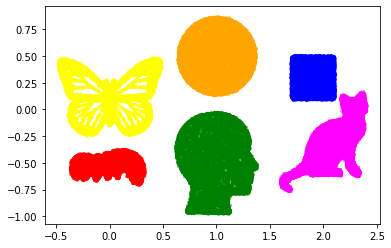

In [277]:
from IPython.display import clear_output
import pdb, time, math, numpy as np, gc, importlib, torch, os, cv2 as cv, ODEModel, matplotlib
import ot
import matplotlib.pyplot as plt
from torch import Tensor, nn
from torch.nn import functional as F 
from torch.autograd import Variable
from torch.distributions import MultivariateNormal
from torchdiffeq import odeint_adjoint as odeint 
from geomloss import SamplesLoss
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
import Utils, LearnVelTraj
importlib.reload(Utils)
from Utils import InputMapping, BoundingBox, ImageDataset, SaveTrajectory, ezshow, SaveTrajectory as st, MiscTransforms
importlib.reload(ODEModel)
from ODEModel import velocMLP, FfjordModel
importlib.reload(LearnVelTraj);
from LearnVelTraj import learn_vel_trajectory

im1 = ImageDataset('frames/butterfly.jpg'); 
im1b = ImageDataset('frames/butterflyfilled.jpg'); 
im2 = ImageDataset('frames/caterpillar.png', noise_std = .005); 
im3 = ImageDataset('frames/circle.jpeg'); 
im4 = ImageDataset('frames/baldhead.jpeg'); 
im5 = ImageDataset('frames/square.png'); 
im6 = ImageDataset('frames/cat1.png'); 

n_inner = 7000;
n_sil = 10000 - n_inner;
d2 = im2.sample(n_inner, n_sil, scale = [-1, -1], center = [0.05, -.5]); 
d1a = im1.sample(n_inner, n_sil, center = [0, 0]); 
d1b = im1b.sample(n_inner, n_sil, center = [0, 0]); 
d3 = im3.sample(n_inner, n_sil, center = [1, .5]); 
d4 = im4.sample(n_inner, n_sil, center = [1, -.5]); 
d5 = im5.sample(n_inner, n_sil, center = [1.9, .3]); 
d6 = im6.sample(n_inner, n_sil, center = [2, -.3]); 

dat1 = torch.cat((d1a[0], d1b[1]),0)
dat2 = torch.cat(d2,0)
dat3 = torch.cat(d3,0)
dat4 = torch.cat(d4,0)
dat5 = torch.cat(d5,0)
dat6 = torch.cat(d6,0)

ezshow(dat1, col='yellow')
ezshow(dat2, col='red')
ezshow(dat3, col='orange')
ezshow(dat4, col='green')
ezshow(dat5, col='blue')
ezshow(dat6, col='magenta')

In [278]:
keyframes, __ = ImageDataset.normalize_samples(torch.stack((dat1, dat6, dat2)).to(device));

model = FfjordModel(sigmac = 4, n_freq = 100, hidden_layers=3, hidden_features=512, tdiv = 2, in_features=3, out_features=2, incrementalMask = False).to(device)
outfolder = "results/experiment_debug_losses/"
model, losses, separate_losses, lrs, n_subs, separate_times = learn_vel_trajectory(keyframes, n_iters = 300, n_subsample=300, model=model, outname=outfolder, sqrtfitloss=True, detachTZM = False)


  0%|          | 1/300 [00:00<03:13,  1.54it/s]

Allocated: 0.43 GB  Reserved: 0.71 GB
[Loss: 1.5340 | lr: 0.0001 | n_subsample: 30] 
[Total time : 0.6487 | Iter: 0.6471 | fit: 0.1802 | reg: 0.1358 | save: 0.0000) | autograd: 0.3290]



 17%|█▋        | 51/300 [00:39<09:32,  2.30s/it]

Allocated: 0.1 GB  Reserved: 0.72 GB
[Loss: 1.1354 | lr: 0.0001 | n_subsample: 38] 
[Total time : 39.3722 | Iter: 33.4651 | fit: 0.1876 | reg: 0.1156 | save: 5.2570) | autograd: 0.4116]



 21%|██▏       | 64/300 [00:49<03:03,  1.29it/s]


KeyboardInterrupt: 

  0%|          | 1/300 [00:00<02:48,  1.77it/s]

Allocated: 0.04 GB  Reserved: 0.37 GB
[Loss: 1.5140 | lr: 0.0001 | n_subsample: 300] 
[Total time : 0.5658 | Iter: 0.5643 | fit: 0.1776 | reg: 0.0818 | save: 0.0000) | autograd: 0.3032]



 17%|█▋        | 51/300 [00:37<09:28,  2.29s/it]

Allocated: 0.04 GB  Reserved: 0.37 GB
[Loss: 1.2436 | lr: 0.0001 | n_subsample: 378] 
[Total time : 37.3442 | Iter: 31.3555 | fit: 0.1798 | reg: 0.1358 | save: 5.4218) | autograd: 0.3841]



 34%|███▎      | 101/300 [01:15<07:33,  2.28s/it]

Allocated: 0.04 GB  Reserved: 0.37 GB
[Loss: 1.1922 | lr: 0.0001 | n_subsample: 476] 
[Total time : 75.5231 | Iter: 32.7624 | fit: 0.1759 | reg: 0.1261 | save: 5.4151) | autograd: 0.3333]



 50%|█████     | 151/300 [01:55<06:02,  2.43s/it]

Allocated: 0.04 GB  Reserved: 0.37 GB
[Loss: 0.8682 | lr: 0.0001 | n_subsample: 600] 
[Total time : 115.7080 | Iter: 34.5407 | fit: 0.2008 | reg: 0.1588 | save: 5.6422) | autograd: 0.3998]



 67%|██████▋   | 201/300 [02:44<04:13,  2.56s/it]

Allocated: 0.04 GB  Reserved: 0.37 GB
[Loss: 0.2674 | lr: 0.0001 | n_subsample: 756] 
[Total time : 164.9491 | Iter: 43.7240 | fit: 0.2343 | reg: 0.1323 | save: 5.5153) | autograd: 0.5157]



 84%|████████▎ | 251/300 [03:34<02:04,  2.55s/it]

Allocated: 0.04 GB  Reserved: 0.37 GB
[Loss: 0.1908 | lr: 0.0001 | n_subsample: 953] 
[Total time : 214.9380 | Iter: 44.5194 | fit: 0.2469 | reg: 0.1878 | save: 5.4675) | autograd: 0.4793]



100%|██████████| 300/300 [04:25<00:00,  1.13it/s]

Allocated: 0.04 GB  Reserved: 0.37 GB
[Loss: 0.1255 | lr: 0.0001 | n_subsample: 953] 
[Total time : 265.2156 | Iter: 44.6366 | fit: 0.2529 | reg: 0.1638 | save: 5.6396) | autograd: 0.4638]




  0%|          | 1/300 [00:01<05:07,  1.03s/it]

Allocated: 0.04 GB  Reserved: 0.37 GB
[Loss: 1.5629 | lr: 0.0001 | n_subsample: 300] 
[Total time : 1.0308 | Iter: 1.0288 | fit: 0.1598 | reg: 0.1176 | save: 0.0000) | autograd: 0.7481]



 17%|█▋        | 51/300 [00:58<11:00,  2.65s/it]

Allocated: 0.04 GB  Reserved: 0.37 GB
[Loss: 1.1998 | lr: 0.0001 | n_subsample: 378] 
[Total time : 58.7387 | Iter: 52.2116 | fit: 0.1623 | reg: 0.0943 | save: 5.4942) | autograd: 0.7690]



 34%|███▎      | 101/300 [02:01<09:29,  2.86s/it]

Allocated: 0.04 GB  Reserved: 0.37 GB
[Loss: 0.9888 | lr: 0.0001 | n_subsample: 476] 
[Total time : 121.4397 | Iter: 57.2954 | fit: 0.1969 | reg: 0.1287 | save: 5.4037) | autograd: 0.8487]



 50%|█████     | 151/300 [03:14<07:17,  2.94s/it]

Allocated: 0.04 GB  Reserved: 0.37 GB
[Loss: 0.6446 | lr: 0.0001 | n_subsample: 600] 
[Total time : 194.7672 | Iter: 68.1100 | fit: 0.2237 | reg: 0.1324 | save: 5.2157) | autograd: 0.9368]



 67%|██████▋   | 201/300 [04:37<05:26,  3.30s/it]

Allocated: 0.04 GB  Reserved: 0.37 GB
[Loss: 0.8881 | lr: 0.0001 | n_subsample: 756] 
[Total time : 277.1335 | Iter: 76.8655 | fit: 0.2684 | reg: 0.1903 | save: 5.4999) | autograd: 1.1811]



 84%|████████▎ | 251/300 [06:04<02:43,  3.34s/it]

Allocated: 0.04 GB  Reserved: 0.37 GB
[Loss: 0.7335 | lr: 5e-05 | n_subsample: 953] 
[Total time : 364.5952 | Iter: 81.7575 | fit: 0.2546 | reg: 0.2042 | save: 5.7029) | autograd: 1.2182]



100%|██████████| 300/300 [07:31<00:00,  1.50s/it]

Allocated: 0.04 GB  Reserved: 0.37 GB
[Loss: 0.7122 | lr: 5e-05 | n_subsample: 953] 
[Total time : 451.3149 | Iter: 81.2737 | fit: 0.2533 | reg: 0.2040 | save: 5.4446) | autograd: 1.2398]



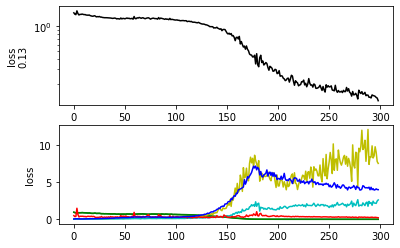

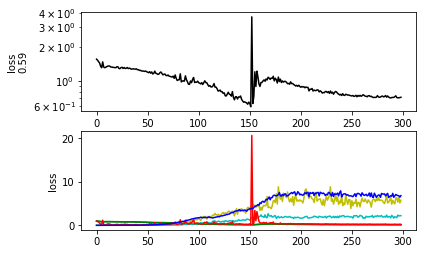

In [240]:
keyframes, __ = ImageDataset.normalize_samples(torch.stack((dat1, dat6, dat2)).to(device));

model = FfjordModel(sigmac = 4, n_freq = 100, hidden_layers=3, hidden_features=512, tdiv = 2, in_features=3, out_features=2, incrementalMask = False).to(device)
outfolder = "results/experiment_tzm_detach_300/"
model, losses, separate_losses, lrs, n_subs, separate_times = learn_vel_trajectory(keyframes, n_iters = 300, n_subsample=300, model=model, outname=outfolder, sqrtfitloss=True, detachTZM = True)

model = FfjordModel(sigmac = 4, n_freq = 100, hidden_layers=3, hidden_features=512, tdiv = 2, in_features=3, out_features=2, incrementalMask = True).to(device)
outfolder = "results/experiment_tzm_no_detach_300/"
model, losses, separate_losses, lrs, n_subs, separate_times = learn_vel_trajectory(keyframes, n_iters = 300, n_subsample=300, model=model, outname=outfolder, sqrtfitloss=True, detachTZM = False)


In [227]:
keyframes, __ = ImageDataset.normalize_samples(torch.stack((dat1, dat6, dat2)).to(device));

model = FfjordModel(sigmac = 3.5, n_freq = 100, hidden_layers=3, hidden_features=512, tdiv = 2, in_features=3, out_features=2, incrementalMask = True).to(device)
outfolder = "results/experiment_radial_temp/"
model, losses, separate_losses, lrs, n_subs, separate_times = learn_vel_trajectory(keyframes, n_iters = 300, n_subsample=300, model=model, outname=outfolder, sqrtfitloss=True, detachTZM = False)

  0%|          | 0/300 [00:00<?, ?it/s]

> /mnt/pzpzpzp1/wassflow/LearnVelTraj.py(115)learn_vel_trajectory()
    113             zz = z_t.reshape(n_tzm_times*n_tzm_points, dim)
    114             pdb.set_trace()
--> 115             tt = fbt[1:].repeat_interleave(n_tzm_points).reshape(-1, 1)
    116             tzm = torch.cat([tzm, torch.cat([tt, zz], 1)], 0)
    117         if detachTZM:



ipdb>  z_t.shape


torch.Size([5, 30, 2])


ipdb>  tb.shape


torch.Size([6])


ipdb>  tb


tensor([1.0000, 0.8807, 0.6925, 0.4082, 0.3750, 0.2293], device='cuda:0')


ipdb>  q


  0%|          | 0/300 [01:14<?, ?it/s]


BdbQuit: 

In [201]:
import Utils; importlib.reload(Utils); from Utils import SaveTrajectory as st
keyframes, __ = ImageDataset.normalize_samples(torch.stack((dat1, dat6, dat2)).to(device));
model = FfjordModel(sigmac = 3.5, n_freq = 100, hidden_layers=3, hidden_features=512, tdiv = 2, in_features=3, out_features=2, incrementalMask = True).to(device)
model.load_state("results/experiment_radial/models/state_final.tar")
x_trajs = st.save_trajectory(model, keyframes, savename='save_debug', nsteps=20, dpiv=400, n=1000, alpha=1, ot_type=1, writeTracers=True)

In [106]:
keyframes, __ = ImageDataset.normalize_samples(torch.stack((dat1, dat6, dat2)).to(device));

model = FfjordModel(sigmac = 3, n_freq = 100, hidden_layers=3, hidden_features=512, tdiv = 2, in_features=3, out_features=2, incrementalMask = True, initzero = False).to(device)
outfolder = "results/experiment_kurl/"
model, losses, separate_losses, lrs, n_subs, separate_times = learn_vel_trajectory(keyframes, n_iters = 500, n_subsample=300, model=model, outname=outfolder, sqrtfitloss=True, detachTZM = False)


  0%|          | 0/500 [00:00<?, ?it/s]

--Return--
None
> /mnt/pzpzpzp1/wassflow/Utils.py(46)radialKE()
     44         return 30*nn.Softplus(beta)(-dets);
     45     def radialKE(tz,z_dots):
---> 46         pdb.set_trace()
     47 
     48 



ipdb>  tz.shape


torch.Size([600, 3])


ipdb>  x = tz[:,1]; y = tz[:,2];
ipdb>  torch.stack((y, -x),dim=0).shape


torch.Size([2, 600])


ipdb>  dir = torch.stack((y, -x),dim=0)
ipdb>  normalizedCircular = dir/dir.norm(p=2,dim=1)


*** RuntimeError: The size of tensor a (600) must match the size of tensor b (2) at non-singleton dimension 1


ipdb>  dir.shape


torch.Size([2, 600])


ipdb>  y.shape


torch.Size([600])


ipdb>  dir = torch.stack((y, -x), dim=1)
ipdb>  dir.shape


torch.Size([600, 2])


ipdb>  dir.norm(p=2,dim=1).shape


torch.Size([600])


ipdb>  normalizedCircular = dir/dir.norm(p=2,dim=1)


*** RuntimeError: The size of tensor a (2) must match the size of tensor b (600) at non-singleton dimension 1


ipdb>  dir.shape


torch.Size([600, 2])


ipdb>  torch.norm(dir,p=2,dim=1).shape


torch.Size([600])


ipdb>  dir.norm(p=2,dim=1).shape


torch.Size([600])


ipdb>  dir.shape


torch.Size([600, 2])


ipdb>  torch.norm(dir,p=2,dim=1,keepdim=True).shape


torch.Size([600, 1])


ipdb>  normalizedCircular = dir/dir.norm(p=2,dim=1,keepdim=True)
ipdb>  normalizedCircular.shape


torch.Size([600, 2])


ipdb>  z_dots.shape


torch.Size([600, 2])


ipdb>  normalizedCircular.shape


torch.Size([600, 2])


ipdb>  torch.dot(z_dots,normalizedCircular).shape


*** RuntimeError: 1D tensors expected, but got 2D and 2D tensors


ipdb>  (z_dots*normalizedCircular).shape


torch.Size([600, 2])


ipdb>  (z_dots*normalizedCircular).sum(dim=1).shape


torch.Size([600])


ipdb>  q


  0%|          | 0/500 [08:53<?, ?it/s]


BdbQuit: 

  1%|          | 1/150 [00:01<02:53,  1.17s/it]

Allocated: 0.04 GB  Reserved: 0.64 GB
[Loss: 1.4142 | lr: 0.0001 | n_subsample: 300] 
[Total time : 1.1661 | Iter: 1.1645 | fit: 0.1963 | reg: 0.2036 | save: 0.0000) | autograd: 0.7626]



 34%|███▍      | 51/150 [01:25<07:30,  4.55s/it]

Allocated: 0.04 GB  Reserved: 0.64 GB
[Loss: 0.0895 | lr: 0.0001 | n_subsample: 378] 
[Total time : 85.7592 | Iter: 75.8583 | fit: 0.3328 | reg: 0.2743 | save: 8.7323) | autograd: 1.4280]



 67%|██████▋   | 101/150 [03:02<03:30,  4.29s/it]

Allocated: 0.04 GB  Reserved: 0.64 GB
[Loss: 0.0323 | lr: 0.0001 | n_subsample: 476] 
[Total time : 182.8113 | Iter: 88.2122 | fit: 0.3094 | reg: 0.1389 | save: 8.8375) | autograd: 0.9932]



100%|██████████| 150/150 [04:34<00:00,  1.83s/it]

Allocated: 0.04 GB  Reserved: 0.64 GB
[Loss: 0.0293 | lr: 0.0001 | n_subsample: 476] 
[Total time : 274.4461 | Iter: 82.8318 | fit: 0.2965 | reg: 0.1288 | save: 8.8007) | autograd: 1.0328]




  1%|          | 1/150 [00:00<01:49,  1.35it/s]

Allocated: 0.06 GB  Reserved: 0.64 GB
[Loss: 1.4142 | lr: 0.0001 | n_subsample: 300] 
[Total time : 0.7391 | Iter: 0.7374 | fit: 0.1595 | reg: 0.0974 | save: 0.0000) | autograd: 0.4780]



 34%|███▍      | 51/150 [01:02<06:08,  3.72s/it]

Allocated: 0.04 GB  Reserved: 0.64 GB
[Loss: 0.1101 | lr: 0.0001 | n_subsample: 378] 
[Total time : 62.8577 | Iter: 53.6957 | fit: 0.2233 | reg: 0.0691 | save: 8.4203) | autograd: 0.6247]



 67%|██████▋   | 101/150 [02:20<03:21,  4.11s/it]

Allocated: 0.04 GB  Reserved: 0.64 GB
[Loss: 0.0385 | lr: 0.0001 | n_subsample: 476] 
[Total time : 140.0952 | Iter: 68.6479 | fit: 0.2709 | reg: 0.2277 | save: 8.5871) | autograd: 1.0704]



100%|██████████| 150/150 [03:48<00:00,  1.52s/it]

Allocated: 0.04 GB  Reserved: 0.64 GB
[Loss: 0.0286 | lr: 0.0001 | n_subsample: 476] 
[Total time : 228.5824 | Iter: 79.8733 | fit: 0.2826 | reg: 0.1592 | save: 8.6108) | autograd: 1.0802]



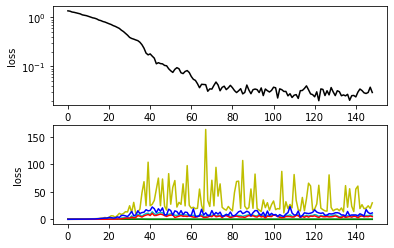

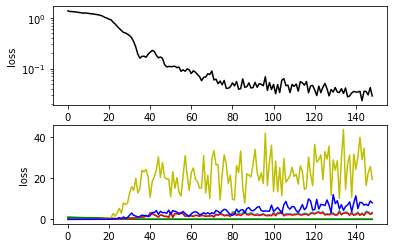

In [26]:
keyframes, __ = ImageDataset.normalize_samples(torch.stack((dat1, dat6, dat2)).to(device));

model = FfjordModel(sigmac = 4, n_freq = 100, hidden_layers=3, hidden_features=512, tdiv = 2, in_features=3, out_features=2, incrementalMask = False, initzero = False).to(device)
outfolder = "results/experiment_without_incremental_mask/"
model, losses, separate_losses, lrs, n_subs, separate_times = learn_vel_trajectory(keyframes, n_iters = 150, n_subsample=300, model=model, outname=outfolder, sqrtfitloss=True)

model = FfjordModel(sigmac = 4, n_freq = 100, hidden_layers=3, hidden_features=512, tdiv = 2, in_features=3, out_features=2, incrementalMask = True, initzero = False).to(device)
outfolder = "results/experiment_with_incremental_mask/"
model, losses, separate_losses, lrs, n_subs, separate_times = learn_vel_trajectory(keyframes, n_iters = 150, n_subsample=300, model=model, outname=outfolder, sqrtfitloss=True)


In [23]:
# establish some baselines. with regularizers and small weight. ~450s for 200 iters.
keyframes, __ = ImageDataset.normalize_samples(torch.stack((dat1, dat6, dat2)).to(device));

model = FfjordModel(sigmac = 4, n_freq = 100, hidden_layers=3, hidden_features=512, tdiv = 2, in_features=3, out_features=2, incrementalMask = True, initzero = False).to(device)
outfolder = "results/experiment_base/"
model, losses, separate_losses, lrs, n_subs, separate_times = learn_vel_trajectory(keyframes, n_iters = 200, n_subsample=300, model=model, outname=outfolder, sqrtfitloss=True)


  0%|          | 1/200 [00:00<03:10,  1.05it/s]

Allocated: 0.03 GB  Reserved: 0.34 GB
[Loss: 1000.0000 | lr: 0.0001 | n_subsample: 300] 
[Total time : 0.9565 | Iter: 0.9548 | fit: 0.1575 | reg: 0.0968 | save: 0.0000) | autograd: 0.6982]


  2%|▏         | 4/200 [00:05<04:05,  1.25s/it]


KeyboardInterrupt: 

  0%|          | 1/300 [00:00<04:38,  1.07it/s]

Allocated: 0.04 GB  Reserved: 0.4 GB
[Loss: 1.4142 | lr: 0.0001 | n_subsample: 300] 
[Total time : 0.9307 | Iter: 0.9288 | fit: 0.1636 | reg: 0.1172 | save: 0.0000) | autograd: 0.6464]


 17%|█▋        | 51/300 [01:13<16:47,  4.05s/it]

Allocated: 0.04 GB  Reserved: 0.4 GB
[Loss: 0.1008 | lr: 0.0001 | n_subsample: 378] 
[Total time : 73.1305 | Iter: 63.5976 | fit: 0.2111 | reg: 0.1375 | save: 8.5986) | autograd: 1.0661]


 34%|███▎      | 101/300 [02:44<14:57,  4.51s/it]

Allocated: 0.04 GB  Reserved: 0.4 GB
[Loss: 0.0338 | lr: 0.0001 | n_subsample: 476] 
[Total time : 164.7504 | Iter: 82.8708 | fit: 0.2317 | reg: 0.1761 | save: 8.7456) | autograd: 1.3259]


 50%|█████     | 151/300 [04:53<12:37,  5.08s/it]

Allocated: 0.04 GB  Reserved: 0.4 GB
[Loss: 0.0321 | lr: 0.0001 | n_subsample: 600] 
[Total time : 293.0161 | Iter: 119.3900 | fit: 0.3070 | reg: 0.1675 | save: 8.8723) | autograd: 1.8464]


 67%|██████▋   | 201/300 [06:59<08:07,  4.93s/it]

Allocated: 0.04 GB  Reserved: 0.4 GB
[Loss: 0.0331 | lr: 0.0001 | n_subsample: 756] 
[Total time : 419.7901 | Iter: 118.0282 | fit: 0.2766 | reg: 0.1524 | save: 8.7414) | autograd: 1.8436]


 84%|████████▎ | 251/300 [09:03<03:58,  4.87s/it]

Allocated: 0.04 GB  Reserved: 0.4 GB
[Loss: 0.0206 | lr: 0.0001 | n_subsample: 953] 
[Total time : 543.3498 | Iter: 114.8276 | fit: 0.2734 | reg: 0.1700 | save: 8.7290) | autograd: 1.6347]


100%|██████████| 300/300 [10:53<00:00,  2.18s/it]


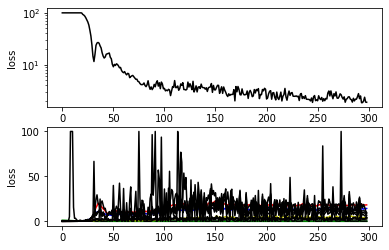

In [72]:
keyframes, __ = ImageDataset.normalize_samples(torch.stack((dat1, dat6, dat2)).to(device));

model = FfjordModel(sigmac = 4, n_freq = 100, hidden_layers=3, hidden_features=512, tdiv = 2, in_features=3, out_features=2, incrementalMask = True).to(device)
outfolder = "results/experiment_relweight/"
model, losses, separate_losses, lrs, n_subs, separate_times = learn_vel_trajectory(keyframes, n_iters = 300, n_subsample=300, model=model, outname=outfolder, sqrtfitloss=True)
st.save_losses(losses, separate_losses, outfolder=outfolder, maxcap=100)

In [ ]:
keyframes, __ = ImageDataset.normalize_samples(torch.stack((dat1, dat6, dat2)).to(device));
sigmacs = range(2,8)
models = []
lossess = []
separate_lossess = []
separate_timess = []
for sigmaci in range(len(sigmacs)):
    sigmac = sigmacs[sigmaci]
    model = FfjordModel(sigmac = 2, n_freq = 100, hidden_layers=3, hidden_features=512, tdiv = 2, in_features=3, out_features=2, incrementalMask = True).to(device)
    outfolder = "results/experiment3_sigma_" + f"{sigmac:02}/"
    model, losses, separate_losses, lrs, n_subs, separate_times = learn_vel_trajectory(keyframes, n_iters = 100, n_subsample=300, model=model, outname=outfolder, sqrtfitloss=True)
    st.save_losses(losses, separate_losses, outfolder=outfolder)
    models.append(model);    lossess.append(losses);    separate_lossess.append(separate_losses);    separate_timess.append(separate_times)

  1%|          | 1/100 [00:00<01:26,  1.14it/s]

Allocated: 0.03 GB  Reserved: 0.38 GB
[Loss: 1.4142 | lr: 0.0001 | n_subsample: 300] 
[Total time : 0.8729 | Iter: 0.8712 | fit: 0.1615 | reg: 0.0960 | save: 0.0000) | autograd: 0.6118]


 19%|█▉        | 19/100 [00:19<01:21,  1.01s/it]


KeyboardInterrupt: 

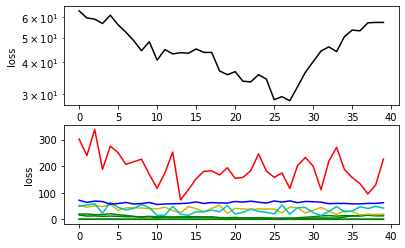

In [16]:
import Utils; importlib.reload(Utils); from Utils import SaveTrajectory as st
st.save_losses(losses, separate_losses, outfolder=outfolder, maxcap=10000, start = 60, end = 500)